
Attaching package: ‘CombMSC’

The following object is masked from ‘package:stats’:

    BIC


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



time series starts 2000-01-03
time series ends   2011-12-30


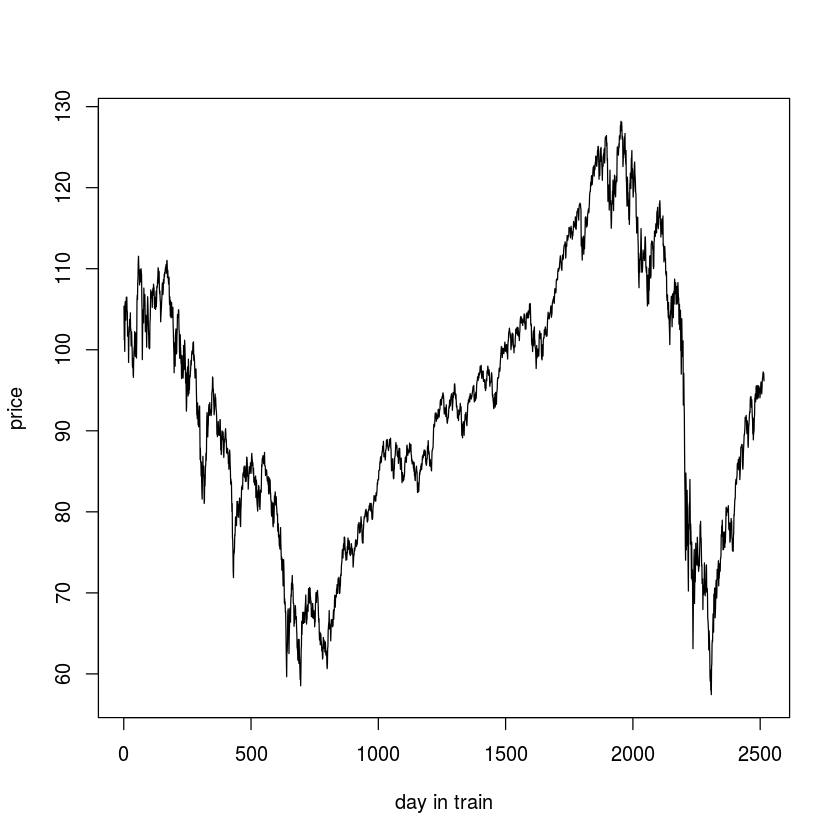

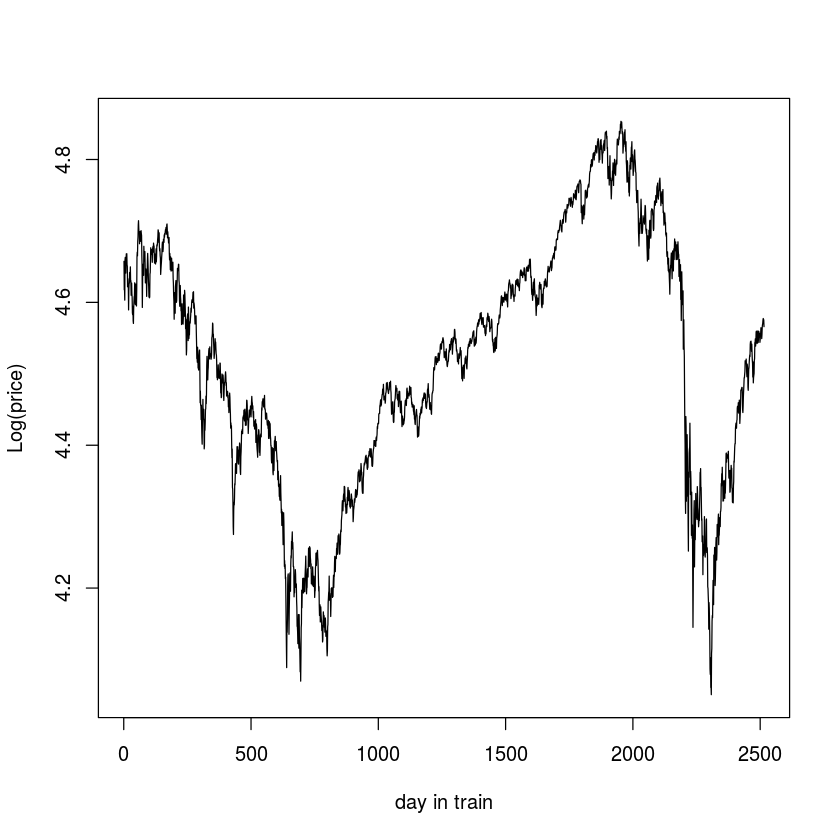

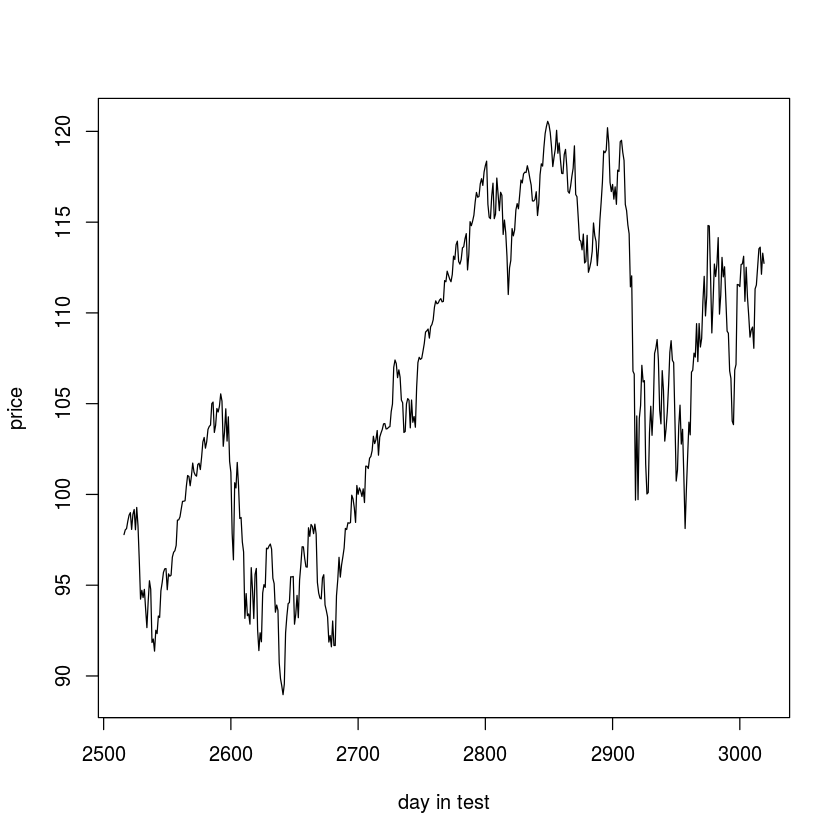

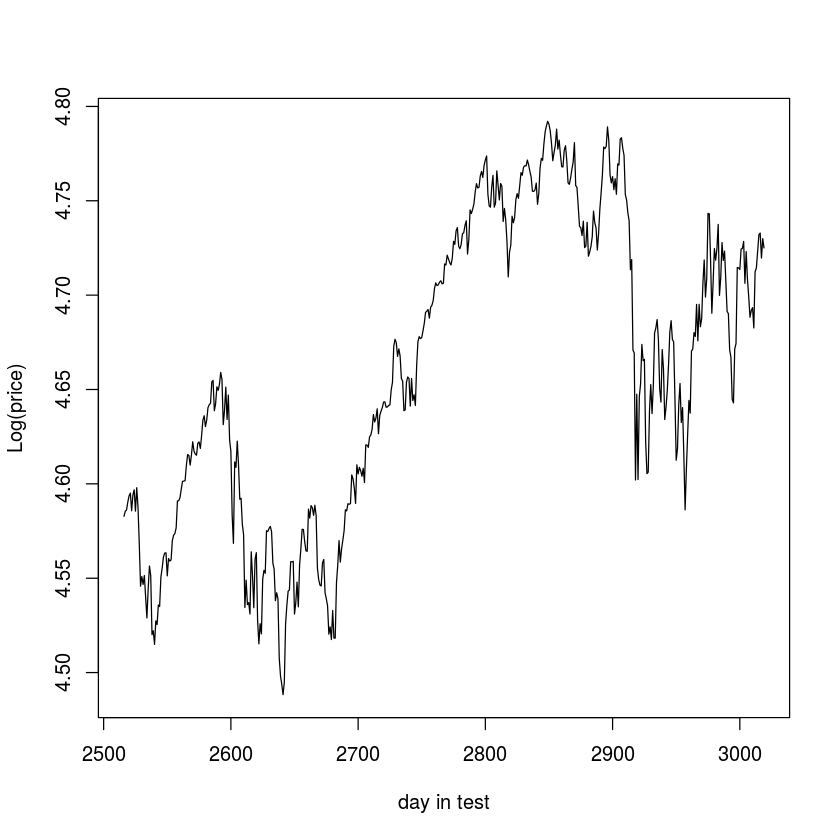

In [1]:
library(CombMSC)
library(tseries)
library(zoo)

library('forecast')


spy = get.hist.quote(instrument = "SPY", "2000-01-01", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train_test = get.hist.quote(instrument = "spy$train", "2011-01-01", "2011-12-31",quote = c("AdjClose"),
#provider = c("yahoo"), method = NULL, compression = "d",
#retclass = c("zoo"), quiet = FALSE, drop = FALSE)


#spy$train =ts(spy$train, frequency=7)

test_len = 504

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test

plot(spy$train,ylab='price', xlab='day in train')
plot(log(spy$train), ylab="Log(price)", xlab="day in train")

plot.ts(spy$test,ylab='price', xlab='day in test')
plot.ts(log(spy$test), ylab="Log(price)", xlab="day in test")

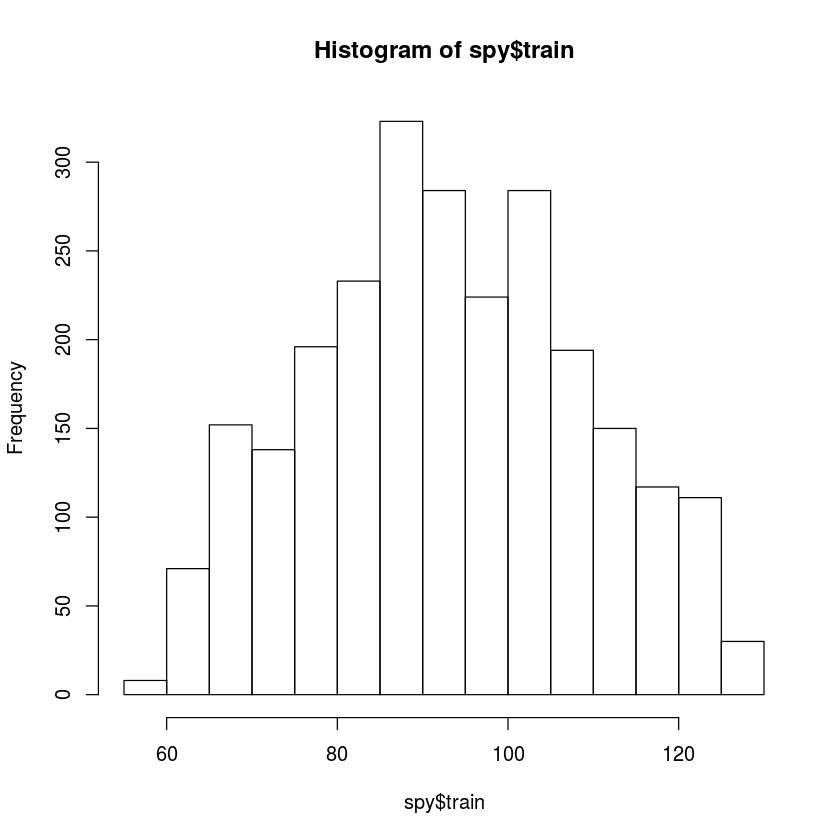

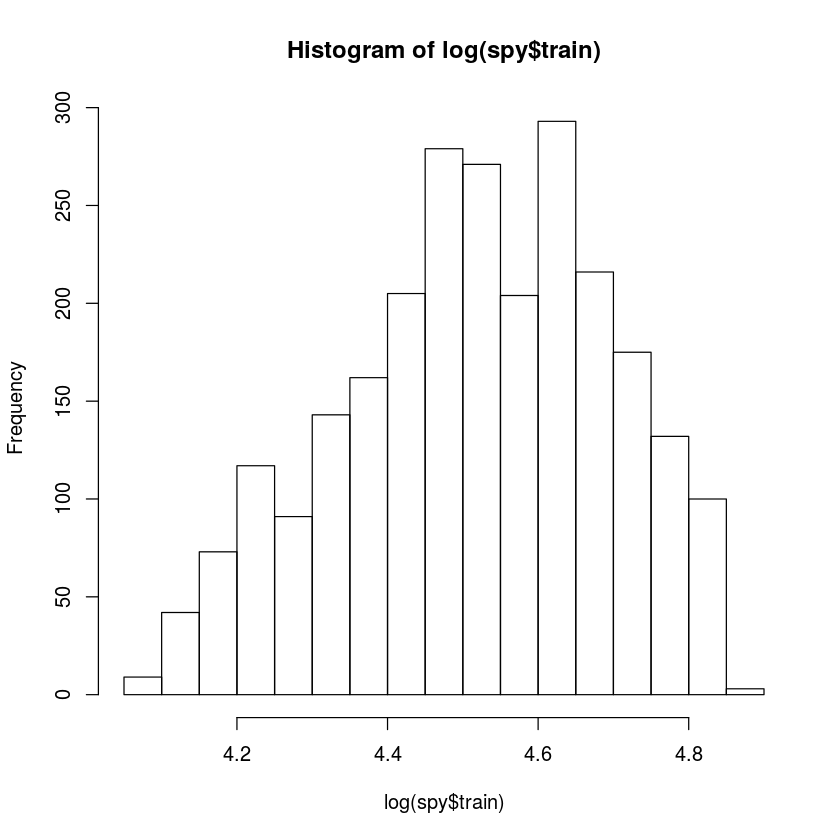

In [10]:
hist(spy$train)
hist(log(spy$train))

Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”

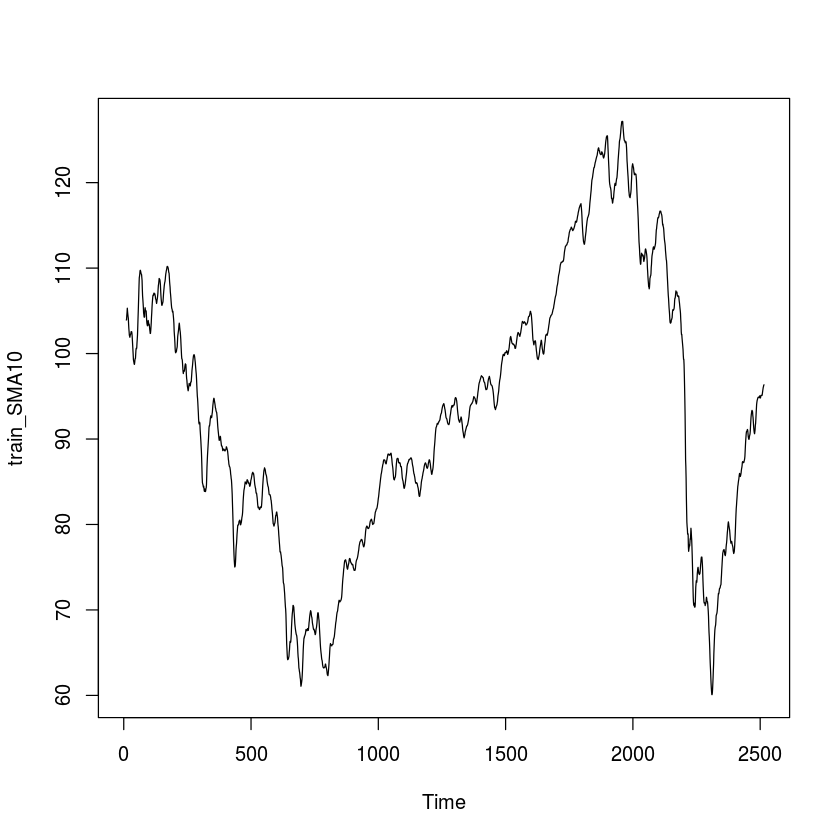

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0002565168,0.1655726,0.114699,0.0007026707,0.1287493,0.4865496,0.01183007,NA
Test set,9.3246979730,12.5380228,10.271581,8.2232832485,9.2436053,43.5717262,0.98547165,8.51611


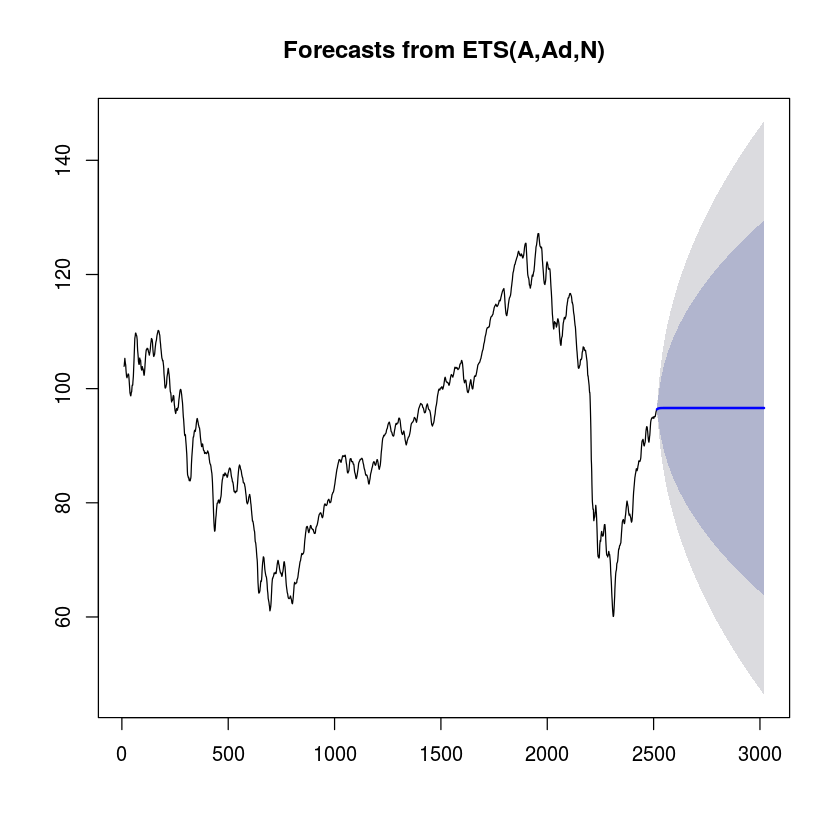

In [3]:
#install.packages('TTR')
library("TTR")


train_SMA10 <- SMA(spy$train,n=10)
plot.ts(train_SMA10)
SMA10_forecast <- forecast(train_SMA10, h=test_len)
plot(SMA10_forecast)
accuracy(SMA10_forecast, spy$test)

Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”

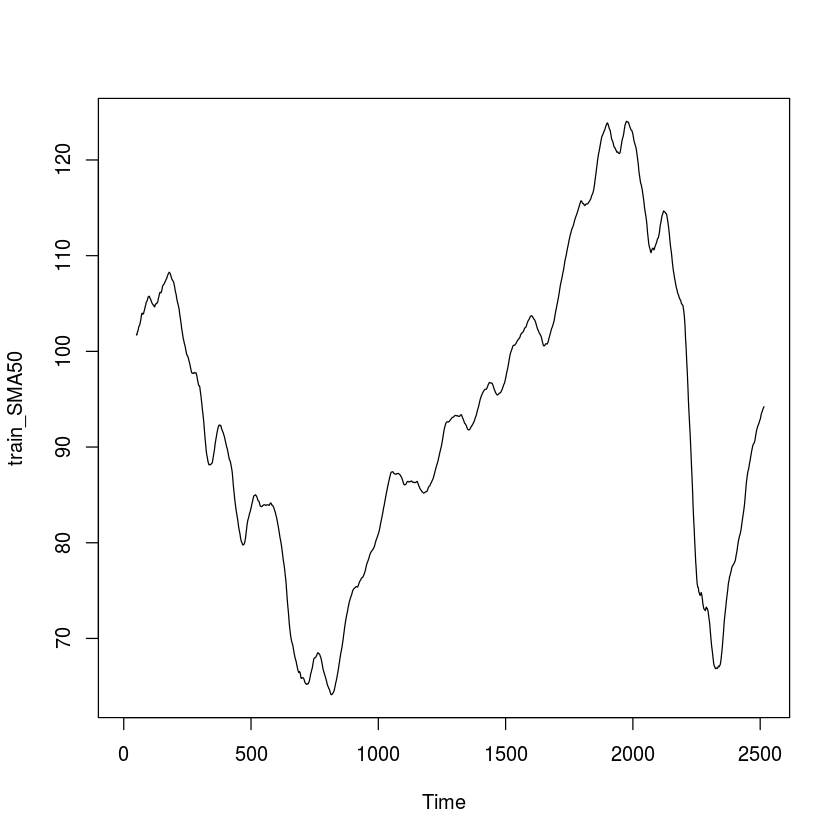

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,1.266438e-05,0.03486295,0.02426853,0.000276192,0.02697009,0.227994,-0.04141103,NA
Test set,9.566475e+00,12.57786839,10.32957520,8.470268403,9.29492432,97.042612,0.98512880,8.545087


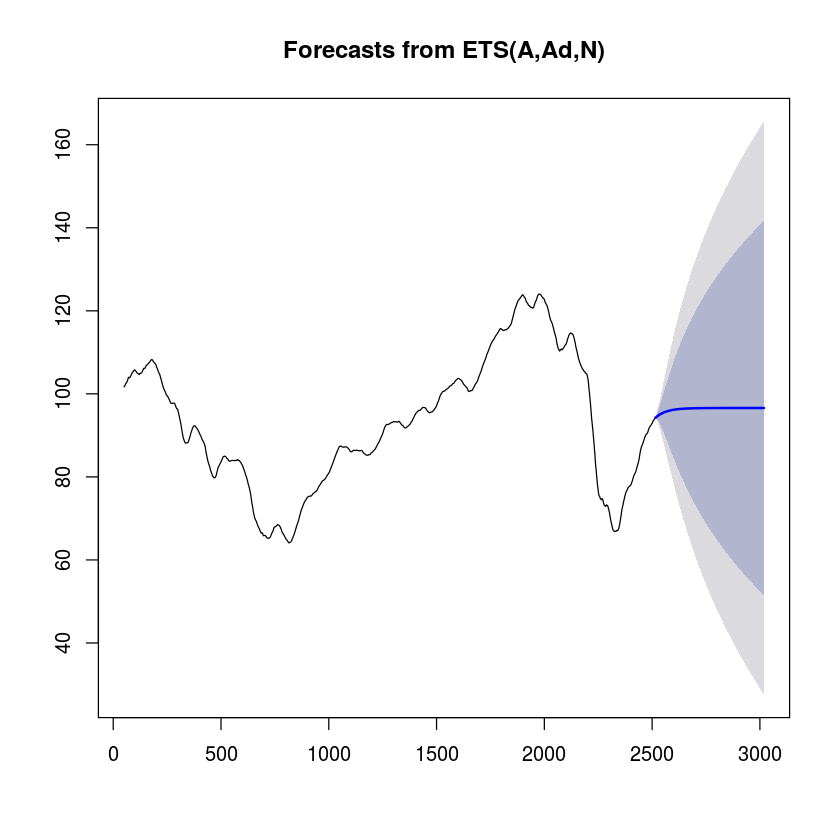

In [4]:
train_SMA50 <- SMA(spy$train,n=50)
plot.ts(train_SMA50)
SMA50_forecast <- forecast(train_SMA50, h=test_len)
plot(SMA50_forecast)
accuracy(SMA50_forecast, spy$test)

Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”

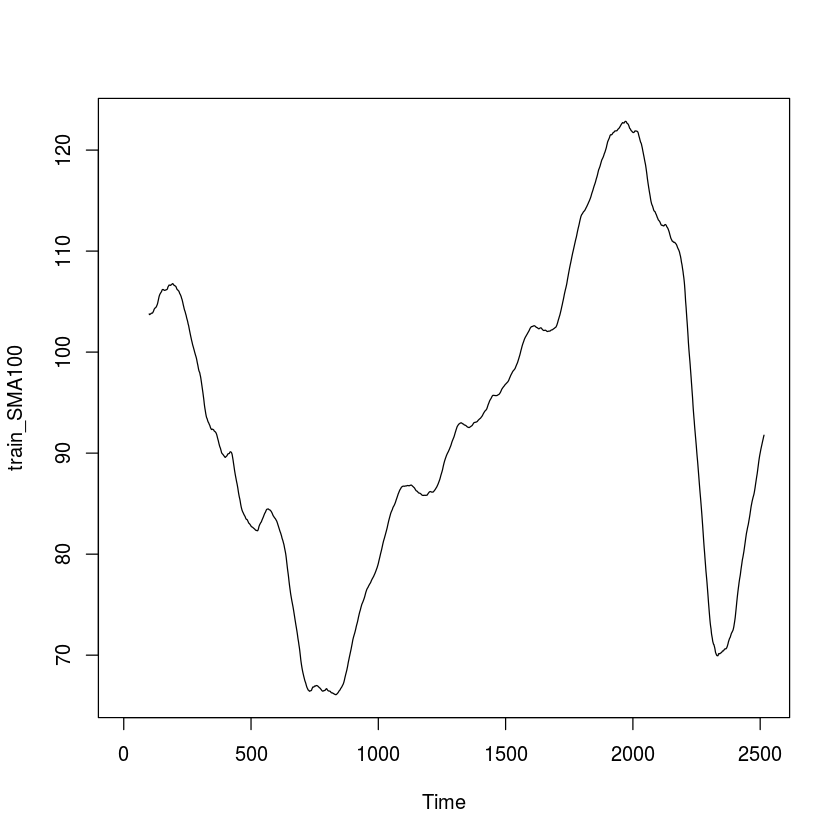

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-9.736044e-06,0.01684288,0.01191373,0.0001437662,0.01326674,0.15243,0.007625512,NA
Test set,9.765847e+00,12.59906763,10.42612736,8.6780163549,9.39234775,133.39696,0.984734119,8.56595


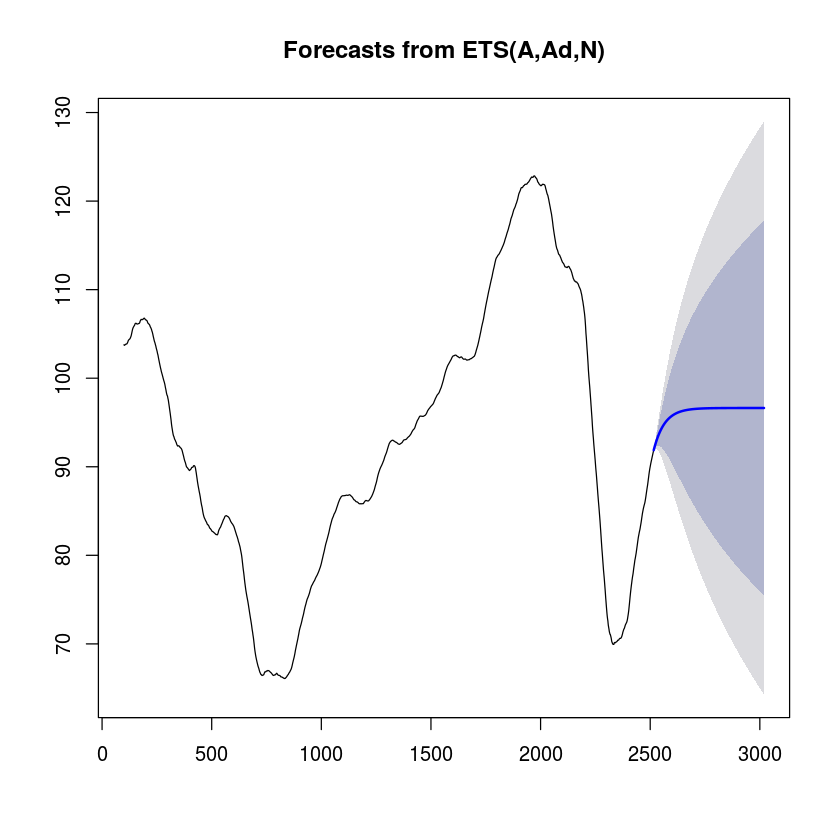

In [5]:
train_SMA100 <- SMA(spy$train,n=100)
plot.ts(train_SMA100)
SMA100_forecast <- forecast(train_SMA100, h=test_len)
plot(SMA100_forecast)
accuracy(SMA100_forecast, spy$test)

In [6]:
train_HW <- HoltWinters(spy$train, beta=FALSE, gamma=FALSE)
train_HW

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = spy$train, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9095636
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 96.24277

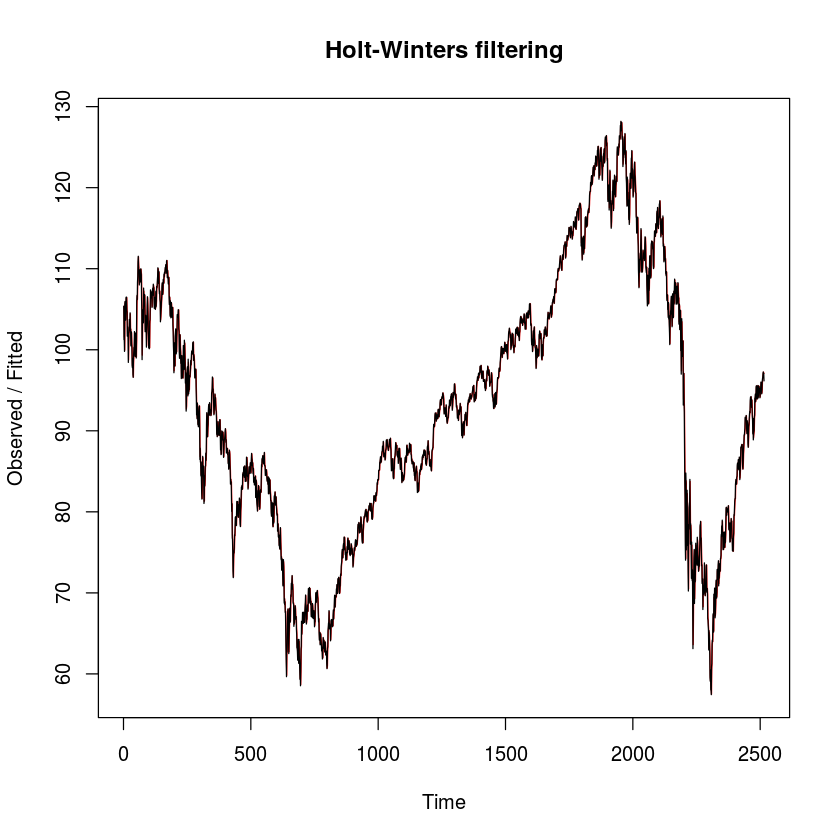

In [7]:
plot(train_HW)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.003990202,1.21083,0.8413193,-0.01475894,0.946411,0.9994423,0.00823223,NA
Test set,9.686384819,12.81128,10.5067838,8.56666631,9.452236,12.4814977,0.98543084,8.703554


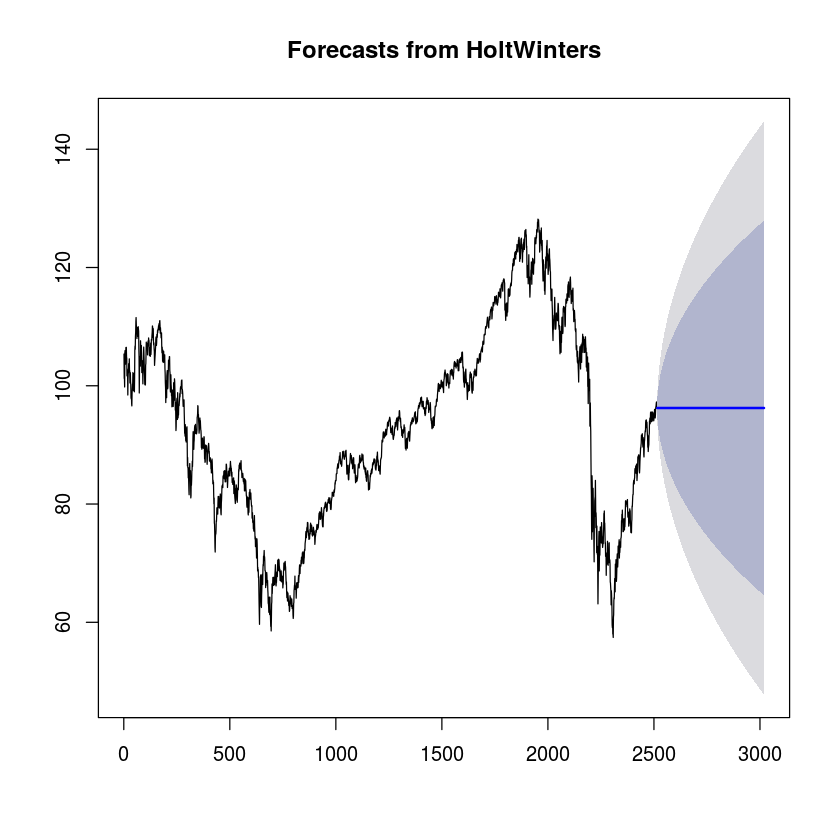

In [8]:

train_HWforecast = forecast.HoltWinters(train_HW, h=504)
plot(train_HWforecast)

accuracy(train_HWforecast, spy$test)